In [10]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
file_path = '/content/drive/MyDrive/Colab Notebooks/vehicles.csv'
import pandas as pd
df = pd.read_csv(file_path)
df.shape

(426880, 26)

In [12]:
# ID 변수 설정 (기존에 ID 컬럼이 없다면 index를 ID로 사용)
df['id'] = df.index

# 타겟 변수 설정
target = 'price'

In [13]:
#기타 변수 데이터 처리
# 불필요한 열 제거
df1 = df.drop(['url', 'region_url', 'image_url', 'VIN', 'county', 'lat', 'long'], axis=1)
list(df1.columns)

['id',
 'region',
 'price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color',
 'description',
 'state',
 'posting_date']

In [14]:

# 결측치 비율 계산
missing_percentage = df1.isnull().mean() * 100

# 결측치가 50% 초과인 열 제거
missing = missing_percentage[missing_percentage > 50].index
df2 = df1.drop(columns=missing)

# 제거된 열 출력
print("제거된 열:")
print(list(missing))

# 현재 남아 있는 열 출력
print("\n남아있는 열:")
list(df2.columns)


제거된 열:
['size']

남아있는 열:


['id',
 'region',
 'price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'type',
 'paint_color',
 'description',
 'state',
 'posting_date']

In [15]:
# 요약 통계 출력
print(df2.describe())


                  id         price           year      odometer
count  426880.000000  4.268800e+05  425675.000000  4.224800e+05
mean   213439.500000  7.519903e+04    2011.235191  9.804333e+04
std    123229.785793  1.218228e+07       9.452120  2.138815e+05
min         0.000000  0.000000e+00    1900.000000  0.000000e+00
25%    106719.750000  5.900000e+03    2008.000000  3.770400e+04
50%    213439.500000  1.395000e+04    2013.000000  8.554800e+04
75%    320159.250000  2.648575e+04    2017.000000  1.335425e+05
max    426879.000000  3.736929e+09    2022.000000  1.000000e+07


In [16]:
# 범주형 변수의 도수분포표 출력
categorical_columns = df2.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(df2[column].value_counts())


region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64
manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln       

In [17]:
#추가적인 변수 데이터 처리
df2 = df2.drop(['id'], axis=1)

In [18]:
# 가격 이상치 제거
df2 = df2[(df2['price'] > 100) & (df2['price'] <= 500000)]

# 주행 거리 이상치 제거
df2 = df2[(df2['odometer'] > 100) & (df2['odometer'] <= 1000000)]

# 연도 이상치 제거
df2 = df2[(df2['year'] >= 1970) & (df2['year'] <= 2021)]

# 이상치 제거 후 요약 통계 재출력
print(df2.describe())


               price           year        odometer
count  377148.000000  377148.000000   377148.000000
mean    18989.230803    2011.729687    95560.632534
std     15103.731856       7.130928    70196.886442
min       101.000000    1970.000000      101.000000
25%      7500.000000    2008.000000    40176.000000
50%     15500.000000    2013.000000    89200.000000
75%     27777.000000    2017.000000   137000.000000
max    470000.000000    2021.000000  1000000.000000


In [19]:
# 수치형 데이터만 포함하는 DataFrame 생성
import numpy as np
# 수치형 데이터 선택
numeric_df = df2.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# 상관계수 행렬 출력
print(correlation_matrix)

             price      year  odometer
price     1.000000  0.465701  -0.45076
year      0.465701  1.000000  -0.47070
odometer -0.450760 -0.470700   1.00000


In [20]:
from scipy import stats

# 연도별 가격 데이터 추출
recent_year = df2['year'].max()
previous_year = df2[df2['year'] < recent_year]['year'].max()

# 두 연도의 가격 데이터
prices_recent = df2[df2['year'] == recent_year]['price'].dropna()
prices_previous = df2[df2['year'] == previous_year]['price'].dropna()

# 독립 표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(prices_recent, prices_previous)

# 결과 출력
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 11.52285384161639, P-value: 1.2953680400590013e-30


In [21]:
from scipy import stats

# 데이터 필터링
before_2000 = df2[df2['year'] < 2000]['price'].dropna()
from_2000_to_2010 = df2[(df2['year'] >= 2000) & (df2['year'] <= 2010)]['price'].dropna()
after_2010 = df2[df2['year'] > 2010]['price'].dropna()

# 각 그룹별 평균 비교를 위한 t-검정
# 2000년 이전 vs 2000~2010년
t_stat_1, p_value_1 = stats.ttest_ind(before_2000, from_2000_to_2010, equal_var=False)

# 2000~2010년 vs 2011년 이후
t_stat_2, p_value_2 = stats.ttest_ind(from_2000_to_2010, after_2010, equal_var=False)

# 결과 출력
print(f"2000년 이전 대비 2000~2010년 T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"2000~2010년 대비 2011년 이후 T-statistic: {t_stat_2}, P-value: {p_value_2}")

2000년 이전 대비 2000~2010년 T-statistic: 9.067419630890994, P-value: 1.3158351784821786e-19
2000~2010년 대비 2011년 이후 T-statistic: -377.2352780835848, P-value: 0.0


In [ ]:
# 1980년 이후 데이터 필터링
df2_filtered = df2[df2['year'] >= 1980]

# 연도별 평균 가격 계산
average_prices = df2_filtered.groupby('year')['price'].mean().reset_index()

# 막대 그래프로 시각화
plt.figure(figsize=(14, 7))
sns.barplot(x='year', y='price', data=average_prices)
plt.title('Average Car Prices by Year Since 1980')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  # X축 레이블 회전
plt.show()

NameError: name 'plt' is not defined

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='year', y='price', data=average_prices)
plt.title('Trend of Average Car Prices by Year Since 1980')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # X축 레이블 회전
plt.grid(True)  # 그리드 추가
plt.show()


In [ ]:
df_selected.head(3)

,manufacturer,cylinders,fuel,transmission,type,year,odometer,price
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11900
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21000


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [22]:
# 범주형 및 연속형 변수 정의
categorical_columns = ['manufacturer', 'cylinders', 'fuel', 'transmission', 'type']
numeric_features = ['odometer', 'year']

# 결측치 처리 및 인코딩 파이프라인 생성
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))  # 연속형 변수에 대한 중앙값 결측치 처리
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # 범주형 변수에 대한 결측치 'missing' 처리
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # 원-핫 인코딩 적용
])

# ColumnTransformer로 전체 전처리 파이프라인 설정
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_columns)
], remainder='drop')  # 사용하지 않는 컬럼은 제거


NameError: name 'Pipeline' is not defined

In [ ]:
# 가격 범주 생성
bins = [101, 7500, 15500, 27777, 470000]
labels = ['저가', '중간가', '고가', '최고가']
df2['price_category'] = pd.cut(df2['price'], bins=bins, labels=labels)
# price_category의 결측치를 제거
df2 = df2.dropna(subset=['price_category'])
# 데이터 전처리
X = df2.drop(['price', 'price_category'], axis=1)
y = df2['price_category']
X_processed = preprocessor.fit_transform(X)


In [ ]:
# 결측치 최종 확인
print(df2.isnull().sum())

region                 0
price                  0
year                   0
manufacturer       12949
model               3844
condition         143508
cylinders         152976
fuel                2073
odometer               0
title_status        6718
transmission        1460
drive             113774
type               79540
paint_color       109767
description            2
state                  0
posting_date           0
price_category         0
dtype: int64


In [23]:
# 전처리 파이프라인을 통해 데이터 변환
X = df2.drop(['price', 'price_category'], axis=1)
y = df2['price_category']
X_processed = preprocessor.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.5, random_state=42, stratify=y)


KeyError: "['price_category'] not found in axis"

In [ ]:
df2.head(3)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,posting_date,price_category
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,2021-05-04T12:31:18-0500,최고가
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,2021-05-04T12:31:08-0500,고가
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,2021-05-04T12:31:25-0500,최고가


In [ ]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
`

Accuracy: 0.4626036136846962
Confusion Matrix:
 [[10049  7345  6159 23562]
 [ 4432 32225  7609  3915]
 [10723 18057 11230  6121]
 [ 6439  3911  3059 33725]]


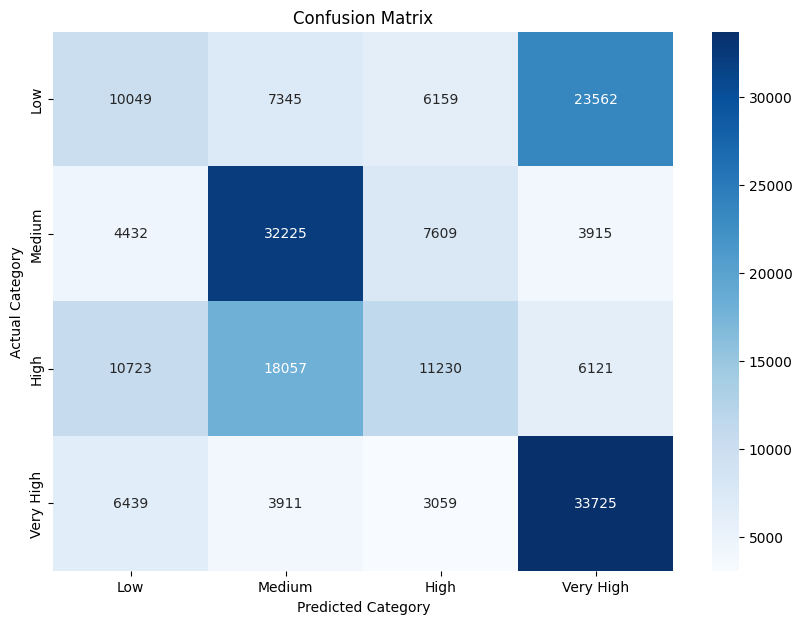

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 혼동 행렬 데이터, 예를 들어 y_test와 y_pred로부터 계산된 결과
confusion = confusion_matrix(y_test, y_pred)

# 혼동 행렬을 DataFrame으로 변환
conf_mat_df = pd.DataFrame(confusion,
                           index=['Low', 'Medium', 'High', 'Very High'],
                           columns=['Low', 'Medium', 'High', 'Very High'])


# 혼동 행렬 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat_df, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.show()


In [ ]:
# 여기서부터는 싸이킷런(Sklean) 신경망 MLPClassifier 사용 로지스틱 회귀는 머신러닝이다. (mlp, 다층 퍼셉트론)

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# 데이터 로드
file_path = '/content/drive/MyDrive/Colab Notebooks/vehicles.csv'
import pandas as pd
df = pd.read_csv(file_path)

# 데이터 크기 확인
print("데이터 크기:", df.shape)


데이터 크기: (426880, 26)


In [3]:
# 불필요한 열 제거 및 결측치 처리
# 불필요한 열 제거
df1 = df.drop(['url', 'region_url', 'image_url', 'VIN', 'county', 'lat', 'long'], axis=1)

# 결측치 비율 계산 및 50% 초과 열 제거
missing_percentage = df1.isnull().mean() * 100
missing = missing_percentage[missing_percentage > 50].index
df2 = df1.drop(columns=missing)

# 제거된 열과 남아 있는 열 출력
print("제거된 열:", list(missing))
print("남아있는 열:", list(df2.columns))


제거된 열: ['size']
남아있는 열: ['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'description', 'state', 'posting_date']


In [7]:
# 첨도와 왜도 계산 (이상치 제거 전)
price_kurtosis_before = df2['price'].kurtosis()
price_skewness_before = df2['price'].skew()
print("Price Kurtosis (이상치 제거 전):", price_kurtosis_before)
print("Price Skewness (이상치 제거 전):", price_skewness_before)

Price Kurtosis (이상치 제거 전): 19.89617266931725
Price Skewness (이상치 제거 전): 2.234460452016896


In [8]:
# 이상치 제거
# 가격, 주행 거리, 연도 이상치 제거
df2 = df2[(df2['price'] > 100) & (df2['price'] <= 500000)]
df2 = df2[(df2['odometer'] > 100) & (df2['odometer'] <= 1000000)]
df2 = df2[(df2['year'] >= 1970) & (df2['year'] <= 2021)]

# 데이터 샘플링 (10% 데이터 사용)
df_sample = df2.sample(frac=0.1, random_state=42)

# 이상치 제거 후 데이터 크기 및 요약 통계 출력
print("이상치 제거 후 데이터 크기:", df_sample.shape)
print(df_sample.describe())


이상치 제거 후 데이터 크기: (37715, 18)
                 id          price          year        odometer
count  3.771500e+04   37715.000000  37715.000000    37715.000000
mean   7.311482e+09   18947.187299   2011.685775    95648.781758
std    4.394367e+06   14914.319777      7.174506    70291.015411
min    7.301583e+09     101.000000   1970.000000      102.000000
25%    7.308141e+09    7500.000000   2008.000000    40153.500000
50%    7.312644e+09   15495.000000   2013.000000    89000.000000
75%    7.315258e+09   27590.000000   2017.000000   137000.000000
max    7.317095e+09  255000.000000   2021.000000  1000000.000000


In [9]:
# 첨도와 왜도 계산 (이상치 제거 후)
price_kurtosis_after = df_sample['price'].kurtosis()
price_skewness_after = df_sample['price'].skew()
print("Price Kurtosis (이상치 제거 후):", price_kurtosis_after)
print("Price Skewness (이상치 제거 후):", price_skewness_after)

Price Kurtosis (이상치 제거 후): 7.510461533236022
Price Skewness (이상치 제거 후): 1.7105074007356877


In [6]:
# 가격 범주 생성 및 결측치 제거
bins = [101, 7500, 15500, 27777, 470000]
labels = ['저가', '중간가', '고가', '최고가']
df_sample['price_category'] = pd.cut(df_sample['price'], bins=bins, labels=labels)
df_sample = df_sample.dropna(subset=['price_category'])

# 범주형 변수 도수분포 확인
print(df_sample['price_category'].value_counts())


price_category
저가     9635
최고가    9386
고가     9375
중간가    9318
Name: count, dtype: int64


In [ ]:
# 데이터 전처리 및 분할
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df_sample.drop(['price', 'price_category'], axis=1)
y = df_sample['price_category']

# 수치형 및 범주형 변수 처리
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features = ['odometer', 'year']
categorical_features = ['manufacturer', 'cylinders', 'fuel', 'transmission', 'type']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 데이터 크기 출력
print("훈련 데이터 크기:", X_train.shape)
print("테스트 데이터 크기:", X_test.shape)

훈련 데이터 크기: (30171, 17)
테스트 데이터 크기: (7543, 17)


In [ ]:
# 그리드 서치 수행
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

# 모델 파이프라인 구축
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(max_iter=200, random_state=42))
])

# 하이퍼파라미터 그리드 정의
# param_grid = {
#     'classifier__hidden_layer_sizes': [(50,), (100,), (50, 25)],
#     'classifier__max_iter': [100, 200],
#     'classifier__activation': ['relu', 'tanh']
# }

# 단순화된 하이퍼파라미터 그리드
param_grid = {
    'classifier__hidden_layer_sizes': [(50,), (100,)],
    'classifier__max_iter': [400, 600],
    'classifier__activation': ['relu', 'tanh']
    # 'classifier__learning_rate_init': [0.001, 0.005, 0.01]  # 학습률 조정
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', verbose=1)

# 그리드 서치 진행 상황 표시
print("그리드 서치 시작")
grid_search.fit(X_train, y_train)
print("그리드 서치 완료")

# 최적 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)


그리드 서치 시작
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

그리드 서치 완료
Best Parameters: {'classifier__activation': 'relu', 'classifier__hidden_layer_sizes': (100,), 'classifier__max_iter': 400}


In [ ]:
# 최적 하이퍼파라미터로 모델 학습
from tqdm import tqdm
import numpy as np

# 최적 모델로 재학습
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
print("모델 학습 완료")


모델 학습 완료


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.draw()


Accuracy: 0.729020283706748
Confusion Matrix:
 [[1236   60  287  292]
 [  66 1441  363   57]
 [ 238  341 1253   32]
 [ 245   32   31 1569]]


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL

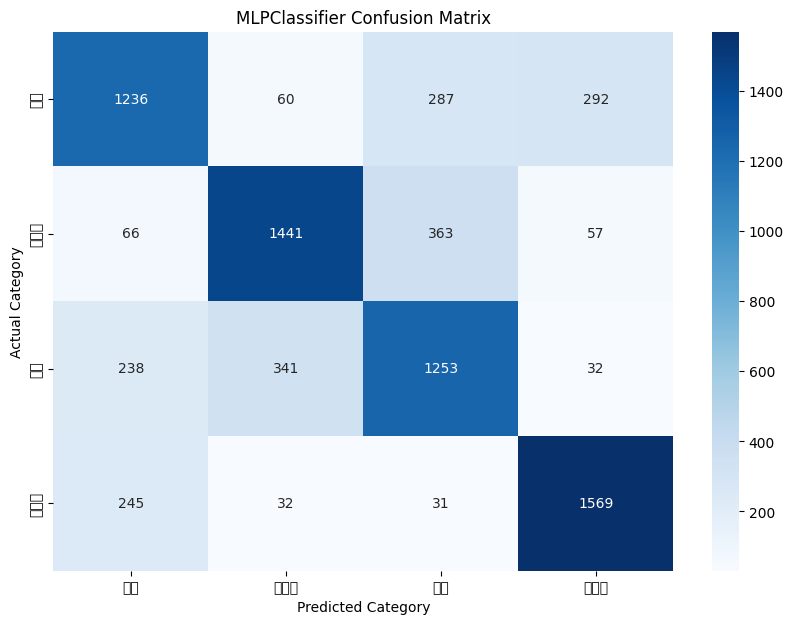

In [ ]:
# 예측 및 평가
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 예측 및 평가
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 혼동 행렬 시각화
confusion = confusion_matrix(y_test, y_pred)
conf_mat_df = pd.DataFrame(confusion,
                           index=['저가', '중간가', '고가', '최고가'],
                           columns=['저가', '중간가', '고가', '최고가'])
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat_df, annot=True, fmt="d", cmap='Blues')
plt.title('MLPClassifier Confusion Matrix')
plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.show()


In [24]:
# Ridge Regression, Lasso Regression, Random Forest Regressor 용 공통코드
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/vehicles.csv'
import pandas as pd
df = pd.read_csv(file_path)
df.shape

# ID 변수 설정 (기존에 ID 컬럼이 없다면 index를 ID로 사용)
df['id'] = df.index

# 타겟 변수 설정
target = 'price'

#기타 변수 데이터 처리
# 불필요한 열 제거
df1 = df.drop(['url', 'region_url', 'image_url', 'VIN', 'county', 'lat', 'long'], axis=1)
list(df1.columns)

# 결측치 비율 계산
missing_percentage = df1.isnull().mean() * 100

# 결측치가 50% 초과인 열 제거
missing = missing_percentage[missing_percentage > 50].index
df2 = df1.drop(columns=missing)

# 제거된 열 출력
print("제거된 열:")
print(list(missing))

# 현재 남아 있는 열 출력
print("\n남아있는 열:")
list(df2.columns)

# 요약 통계 출력
print(df2.describe())

# 범주형 변수의 도수분포표 출력
categorical_columns = df2.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(df2[column].value_counts())

#추가적인 변수 데이터 처리
df2 = df2.drop(['id'], axis=1)

# 가격 이상치 제거
df2 = df2[(df2['price'] > 100) & (df2['price'] <= 500000)]

# 주행 거리 이상치 제거
df2 = df2[(df2['odometer'] > 100) & (df2['odometer'] <= 1000000)]

# 연도 이상치 제거
df2 = df2[(df2['year'] >= 1970) & (df2['year'] <= 2021)]

# 이상치 제거 후 요약 통계 재출력
print(df2.describe())

# 수치형 데이터만 포함하는 DataFrame 생성
import numpy as np
# 수치형 데이터 선택
numeric_df = df2.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# 상관계수 행렬 출력
print(correlation_matrix)

# 가격 범주 생성
bins = [101, 7500, 15500, 27777, 470000]
labels = ['저가', '중간가', '고가', '최고가']
df2['price_category'] = pd.cut(df2['price'], bins=bins, labels=labels)
# price_category의 결측치를 제거
df2 = df2.dropna(subset=['price_category'])

# 데이터 전처리
X = df2.drop(['price', 'price_category'], axis=1)
y = df2['price_category']

# 수치형 및 범주형 변수 처리
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features = ['odometer', 'year']
categorical_features = ['manufacturer', 'cylinders', 'fuel', 'transmission', 'type']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 데이터 크기 출력
print("훈련 데이터 크기:", X_train.shape)
print("테스트 데이터 크기:", X_test.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
제거된 열:
['size']

남아있는 열:
                  id         price           year      odometer
count  426880.000000  4.268800e+05  425675.000000  4.224800e+05
mean   213439.500000  7.519903e+04    2011.235191  9.804333e+04
std    123229.785793  1.218228e+07       9.452120  2.138815e+05
min         0.000000  0.000000e+00    1900.000000  0.000000e+00
25%    106719.750000  5.900000e+03    2008.000000  3.770400e+04
50%    213439.500000  1.395000e+04    2013.000000  8.554800e+04
75%    320159.250000  2.648575e+04    2017.000000  1.335425e+05
max    426879.000000  3.736929e+09    2022.000000  1.000000e+07
region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas 

제거된 열:
['size']

남아있는 열:
                  id         price           year      odometer
count  426880.000000  4.268800e+05  425675.000000  4.224800e+05
mean   213439.500000  7.519903e+04    2011.235191  9.804333e+04
std    123229.785793  1.218228e+07       9.452120  2.138815e+05
min         0.000000  0.000000e+00    1900.000000  0.000000e+00
25%    106719.750000  5.900000e+03    2008.000000  3.770400e+04
50%    213439.500000  1.395000e+04    2013.000000  8.554800e+04
75%    320159.250000  2.648575e+04    2017.000000  1.335425e+05
max    426879.000000  3.736929e+09    2022.000000  1.000000e+07
region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64
m

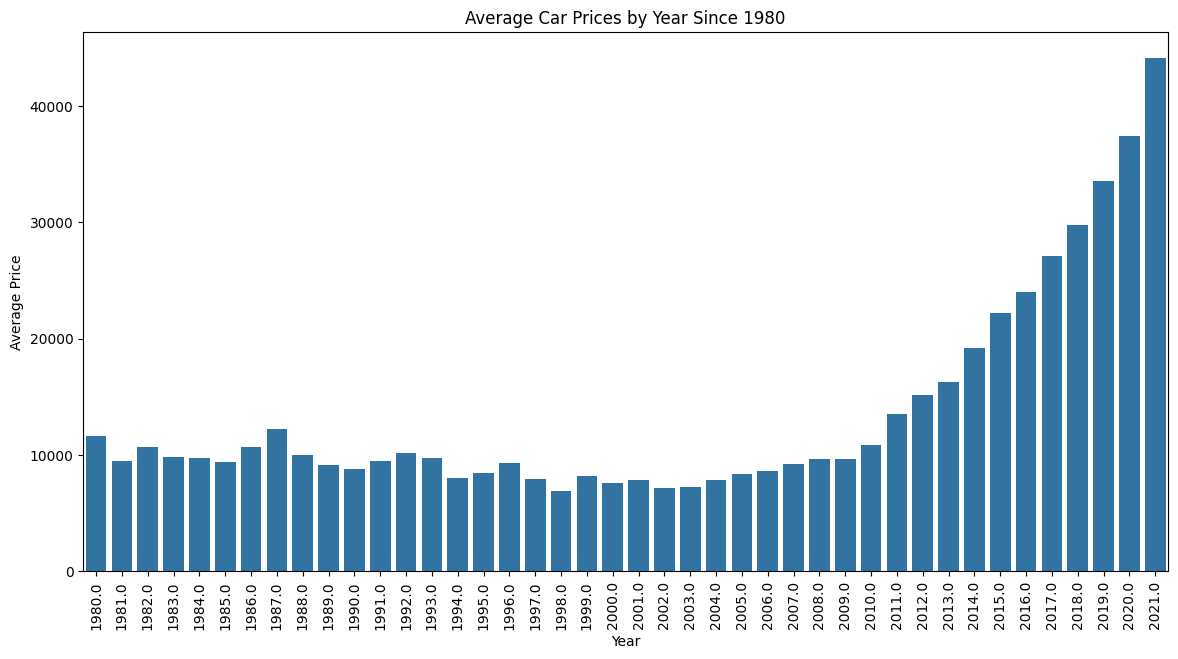

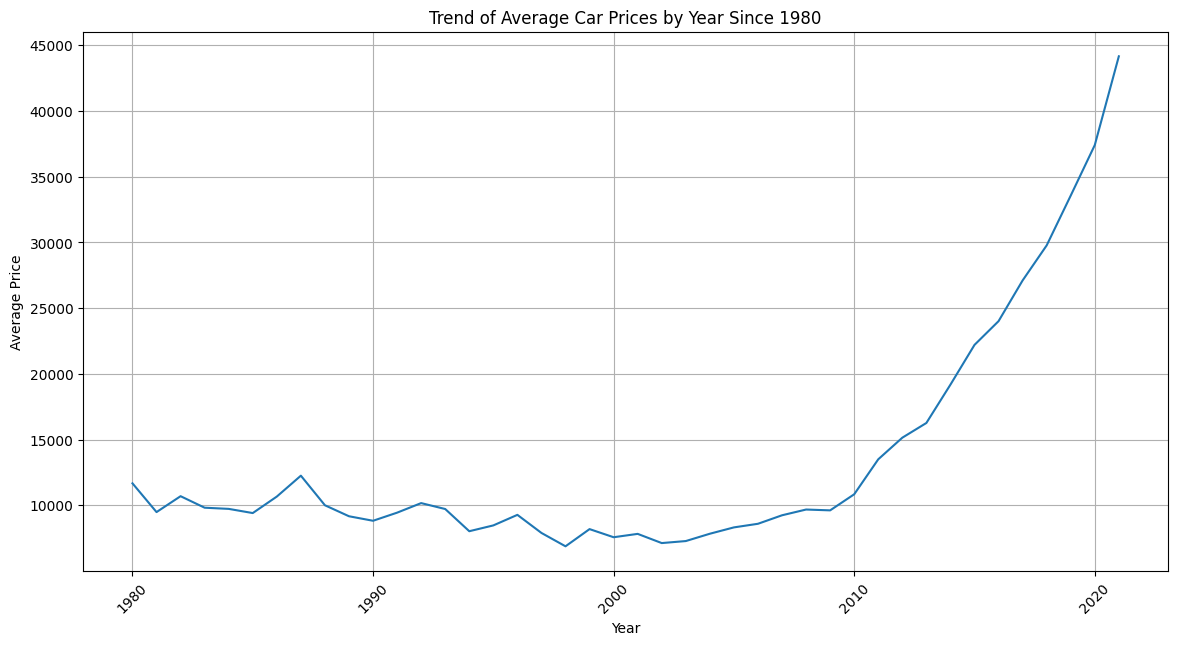

In [29]:
# ID 변수 설정 (기존에 ID 컬럼이 없다면 index를 ID로 사용)
df['id'] = df.index

# 타겟 변수 설정
target = 'price'

#기타 변수 데이터 처리
# 불필요한 열 제거
df1 = df.drop(['url', 'region_url', 'image_url', 'VIN', 'county', 'lat', 'long'], axis=1)
list(df1.columns)

# 결측치 비율 계산
missing_percentage = df1.isnull().mean() * 100

# 결측치가 50% 초과인 열 제거
missing = missing_percentage[missing_percentage > 50].index
df2 = df1.drop(columns=missing)

# 제거된 열 출력
print("제거된 열:")
print(list(missing))

# 현재 남아 있는 열 출력
print("\n남아있는 열:")
list(df2.columns)

# 요약 통계 출력
print(df2.describe())

# 범주형 변수의 도수분포표 출력
categorical_columns = df2.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(df2[column].value_counts())

#추가적인 변수 데이터 처리
df2 = df2.drop(['id'], axis=1)

# 가격 이상치 제거
df2 = df2[(df2['price'] > 100) & (df2['price'] <= 500000)]

# 주행 거리 이상치 제거
df2 = df2[(df2['odometer'] > 100) & (df2['odometer'] <= 1000000)]

# 연도 이상치 제거
df2 = df2[(df2['year'] >= 1970) & (df2['year'] <= 2021)]

# 이상치 제거 후 요약 통계 재출력
print(df2.describe())

# 수치형 데이터만 포함하는 DataFrame 생성
import numpy as np
# 수치형 데이터 선택
numeric_df = df2.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# 상관계수 행렬 출력
print(correlation_matrix)

from scipy import stats

# 연도별 가격 데이터 추출
recent_year = df2['year'].max()
previous_year = df2[df2['year'] < recent_year]['year'].max()

# 두 연도의 가격 데이터
prices_recent = df2[df2['year'] == recent_year]['price'].dropna()
prices_previous = df2[df2['year'] == previous_year]['price'].dropna()

# 독립 표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(prices_recent, prices_previous)

# 결과 출력
print(f"T-statistic: {t_stat}, P-value: {p_value}")

from scipy import stats

# 데이터 필터링
before_2000 = df2[df2['year'] < 2000]['price'].dropna()
from_2000_to_2010 = df2[(df2['year'] >= 2000) & (df2['year'] <= 2010)]['price'].dropna()
after_2010 = df2[df2['year'] > 2010]['price'].dropna()

# 각 그룹별 평균 비교를 위한 t-검정
# 2000년 이전 vs 2000~2010년
t_stat_1, p_value_1 = stats.ttest_ind(before_2000, from_2000_to_2010, equal_var=False)

# 2000~2010년 vs 2011년 이후
t_stat_2, p_value_2 = stats.ttest_ind(from_2000_to_2010, after_2010, equal_var=False)

# 결과 출력
print(f"2000년 이전 대비 2000~2010년 T-statistic: {t_stat_1}, P-value: {p_value_1}")
print(f"2000~2010년 대비 2011년 이후 T-statistic: {t_stat_2}, P-value: {p_value_2}")

# 1980년 이후 데이터 필터링
df2_filtered = df2[df2['year'] >= 1980]

# 연도별 평균 가격 계산
average_prices = df2_filtered.groupby('year')['price'].mean().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

# 막대 그래프로 시각화
plt.figure(figsize=(14, 7))
sns.barplot(x='year', y='price', data=average_prices)
plt.title('Average Car Prices by Year Since 1980')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  # X축 레이블 회전
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(x='year', y='price', data=average_prices)
plt.title('Trend of Average Car Prices by Year Since 1980')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # X축 레이블 회전
plt.grid(True)  # 그리드 추가
plt.show()

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# 불필요한 열 제거
df1 = df.drop(['url', 'region_url', 'image_url', 'VIN', 'county', 'lat', 'long'], axis=1)

# 결측치 비율 계산 및 50% 초과 열 제거
missing_percentage = df1.isnull().mean() * 100
missing = missing_percentage[missing_percentage > 50].index
df2 = df1.drop(columns=missing)

# 이상치 제거
df2 = df2[(df2['price'] > 100) & (df2['price'] <= 500000)]
df2 = df2[(df2['odometer'] > 100) & (df2['odometer'] <= 1000000)]
df2 = df2[(df2['year'] >= 1970) & (df2['year'] <= 2021)]

# 가격 범주 생성
bins = [101, 7500, 15500, 27777, 470000]
labels = ['저가', '중간가', '고가', '최고가']
df2['price_category'] = pd.cut(df2['price'], bins=bins, labels=labels)

# 샘플링 비율 조정
df_sample = df2.groupby('price_category', group_keys=False).apply(lambda x: x.sample(min(len(x), 100), random_state=42))

# 데이터 전처리 및 분할
X = df_sample.drop(['price', 'price_category'], axis=1)
y = df_sample['price']

# 범주형 및 연속형 변수 정의
categorical_columns = ['manufacturer', 'cylinders', 'fuel', 'transmission', 'type']
numeric_features = ['odometer', 'year']

# 결측치 처리 및 인코딩 파이프라인 생성
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))  # 연속형 변수에 대한 중앙값 결측치 처리
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # 범주형 변수에 대한 결측치 'missing' 처리
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # 원-핫 인코딩 적용
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_columns)
], remainder='drop')

# 데이터 전처리
X_processed = preprocessor.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.5, random_state=42)

# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# 예측 및 평가
y_pred = ridge_model.predict(X_test)
print("Ridge Regression R^2:", r2_score(y_test, y_pred))
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred))

# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

# 예측 및 평가
y_pred = lasso_model.predict(X_test)
print("Lasso Regression R^2:", r2_score(y_test, y_pred))
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred))

# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# 예측 및 평가
y_pred = rf_model.predict(X_test)
print("Random Forest Regressor R^2:", r2_score(y_test, y_pred))
print("Random Forest Regressor MSE:", mean_squared_error(y_test, y_pred))

<ipython-input-32-b90f9cbfd633>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price_category'] = pd.cut(df2['price'], bins=bins, labels=labels)


Ridge Regression R^2: 0.2455281268463505
Ridge Regression MSE: 143949652.6817322
Lasso Regression R^2: 0.5027547349145576
Lasso Regression MSE: 94872036.65723434
Random Forest Regressor R^2: 0.5962050325196473
Random Forest Regressor MSE: 77042163.3883635


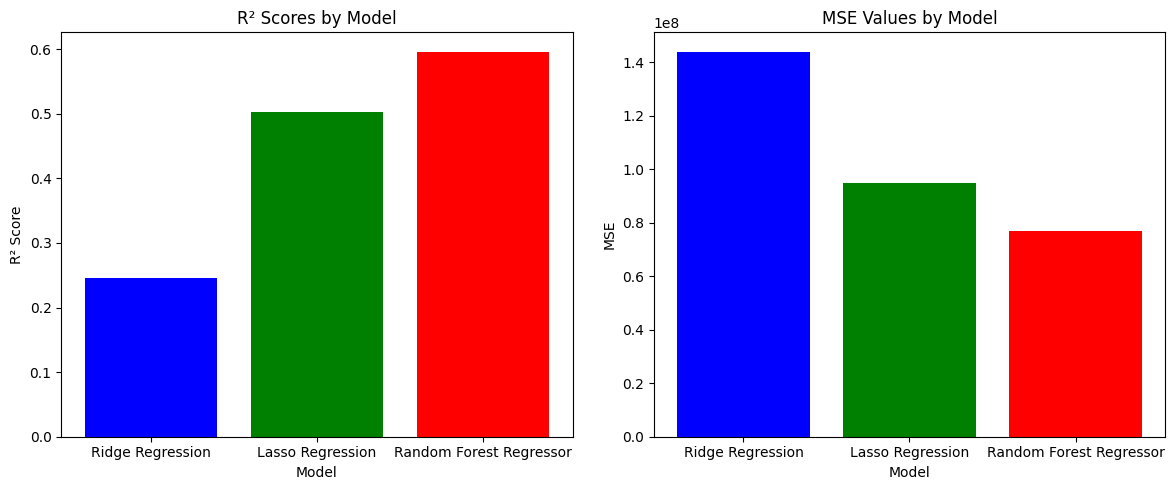

In [33]:
import matplotlib.pyplot as plt

# 모델별 R² 점수와 MSE 값
models = ['Ridge Regression', 'Lasso Regression', 'Random Forest Regressor']
r2_scores = [0.2455281268463505, 0.5027547349145576, 0.5962050325196473]
mse_values = [143949652.6817322, 94872036.65723434, 77042163.3883635]

# R² 점수 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(models, r2_scores, color=['blue', 'green', 'red'])
plt.title('R² Scores by Model')
plt.xlabel('Model')
plt.ylabel('R² Score')

# MSE 값 시각화
plt.subplot(1, 2, 2)
plt.bar(models, mse_values, color=['blue', 'green', 'red'])
plt.title('MSE Values by Model')
plt.xlabel('Model')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()


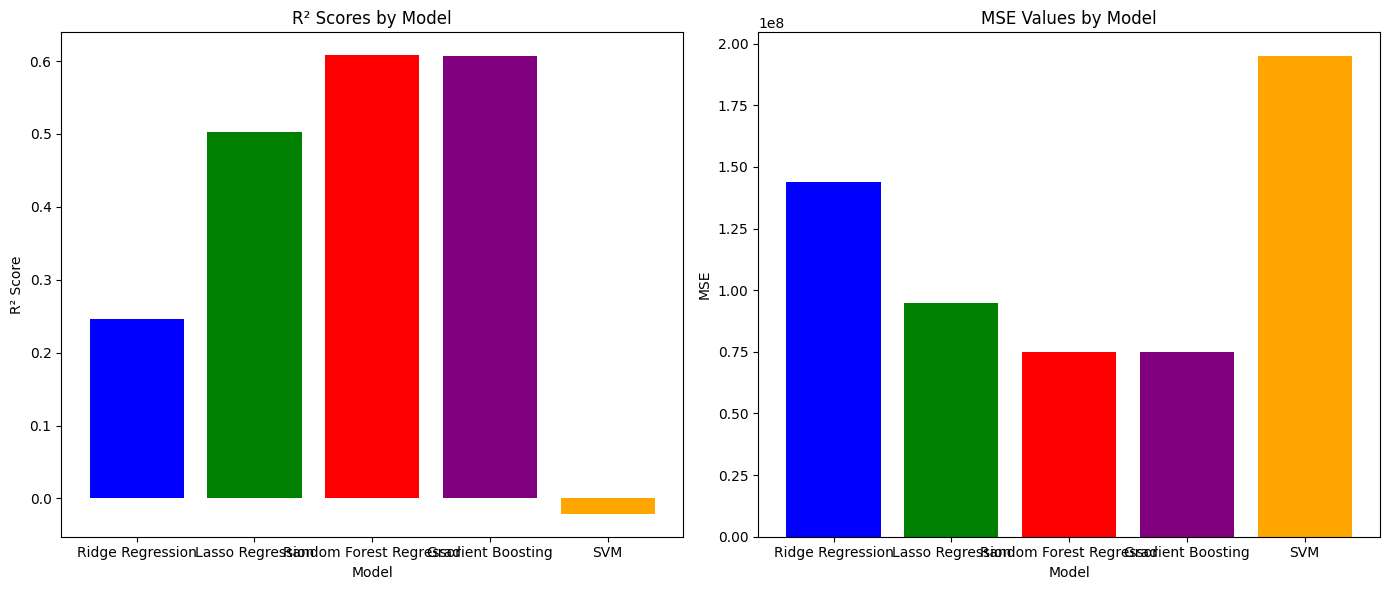

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_ridge = ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)

# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_lasso = lasso_model.predict(X_test)
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_rf = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_gb = gb_model.predict(X_test)
gb_r2 = r2_score(y_test, y_pred_gb)
gb_mse = mean_squared_error(y_test, y_pred_gb)

# Support Vector Regressor
svm_model = SVR()
svm_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_svm = svm_model.predict(X_test)
svm_r2 = r2_score(y_test, y_pred_svm)
svm_mse = mean_squared_error(y_test, y_pred_svm)

# 모델별 R² 점수와 MSE 값
models = ['Ridge Regression', 'Lasso Regression', 'Random Forest Regressor', 'Gradient Boosting', 'SVM']
r2_scores = [ridge_r2, lasso_r2, rf_r2, gb_r2, svm_r2]
mse_values = [ridge_mse, lasso_mse, rf_mse, gb_mse, svm_mse]

# R² 점수 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(models, r2_scores, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('R² Scores by Model')
plt.xlabel('Model')
plt.ylabel('R² Score')

# MSE 값 시각화
plt.subplot(1, 2, 2)
plt.bar(models, mse_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('MSE Values by Model')
plt.xlabel('Model')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()


Ridge Regression R^2: 0.2455, MSE: 143949652.68
Lasso Regression R^2: 0.5028, MSE: 94872036.66
Random Forest Regressor R^2: 0.6076, MSE: 74864236.81
Gradient Boosting R^2: 0.6063, MSE: 75118250.02
SVM R^2: -0.0211, MSE: 194827783.58


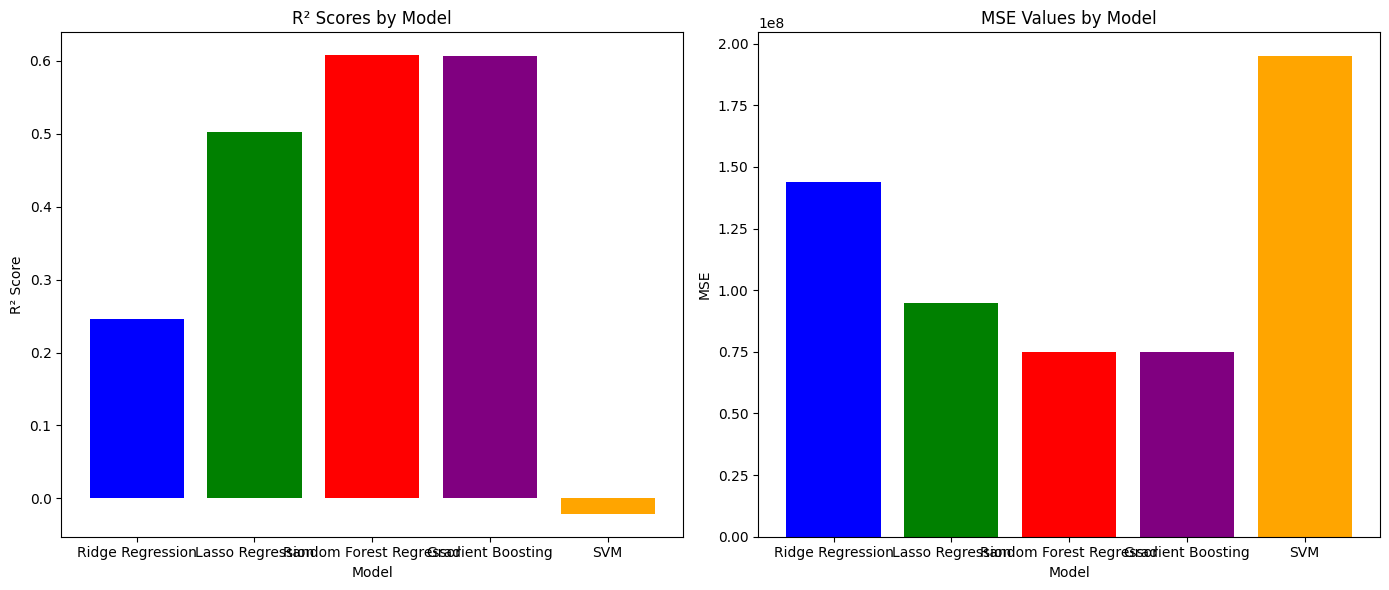

In [36]:
# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_ridge = ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)

# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_lasso = lasso_model.predict(X_test)
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_rf = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_gb = gb_model.predict(X_test)
gb_r2 = r2_score(y_test, y_pred_gb)
gb_mse = mean_squared_error(y_test, y_pred_gb)

# Support Vector Regressor
svm_model = SVR()
svm_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_svm = svm_model.predict(X_test)
svm_r2 = r2_score(y_test, y_pred_svm)
svm_mse = mean_squared_error(y_test, y_pred_svm)

# 모델별 R² 점수와 MSE 값
models = ['Ridge Regression', 'Lasso Regression', 'Random Forest Regressor', 'Gradient Boosting', 'SVM']
r2_scores = [ridge_r2, lasso_r2, rf_r2, gb_r2, svm_r2]
mse_values = [ridge_mse, lasso_mse, rf_mse, gb_mse, svm_mse]

# R² 점수 및 MSE 값 출력
for model, r2, mse in zip(models, r2_scores, mse_values):
    print(f"{model} R^2: {r2:.4f}, MSE: {mse:.2f}")

# R² 점수 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(models, r2_scores, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('R² Scores by Model')
plt.xlabel('Model')
plt.ylabel('R² Score')

# MSE 값 시각화
plt.subplot(1, 2, 2)
plt.bar(models, mse_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('MSE Values by Model')
plt.xlabel('Model')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

In [37]:
!pip install xgboost

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import xgboost as xgb

Ridge R^2: 0.2455, MSE: 143949652.68
Lasso R^2: 0.5028, MSE: 94872036.66
Random Forest R^2: 0.5970, MSE: 76886152.45
Gradient Boosting R^2: 0.6209, MSE: 72334439.25
XGBoost R^2: 0.5487, MSE: 86099680.45
SVM R^2: -0.0211, MSE: 194827783.58


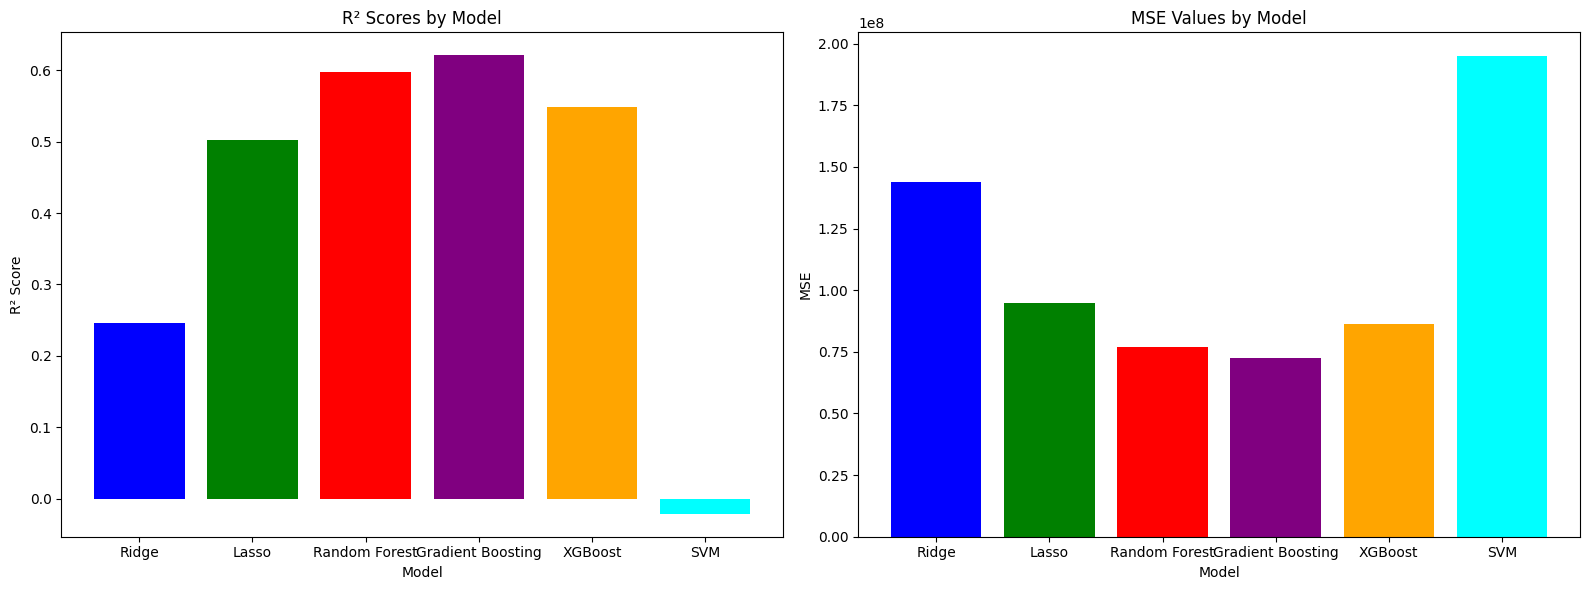

In [40]:
# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_ridge = ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)

# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_lasso = lasso_model.predict(X_test)
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_rf = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_gb = gb_model.predict(X_test)
gb_r2 = r2_score(y_test, y_pred_gb)
gb_mse = mean_squared_error(y_test, y_pred_gb)

# XGBoost Regressor
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_xgb = xgb_model.predict(X_test)
xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)

# Support Vector Regressor
svm_model = SVR()
svm_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_svm = svm_model.predict(X_test)
svm_r2 = r2_score(y_test, y_pred_svm)
svm_mse = mean_squared_error(y_test, y_pred_svm)

# 모델별 R² 점수와 MSE 값
models = ['Ridge', 'Lasso', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'SVM']
r2_scores = [ridge_r2, lasso_r2, rf_r2, gb_r2, xgb_r2, svm_r2]
mse_values = [ridge_mse, lasso_mse, rf_mse, gb_mse, xgb_mse, svm_mse]

# R² 점수 및 MSE 값 출력
for model, r2, mse in zip(models, r2_scores, mse_values):
    print(f"{model} R^2: {r2:.4f}, MSE: {mse:.2f}")

# R² 점수 시각화
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.bar(models, r2_scores, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.title('R² Scores by Model')
plt.xlabel('Model')
plt.ylabel('R² Score')

# MSE 값 시각화
plt.subplot(1, 2, 2)
plt.bar(models, mse_values, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.title('MSE Values by Model')
plt.xlabel('Model')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

Ridge Regression R^2: 0.2455, MSE: 143949652.68
Lasso Regression R^2: 0.5028, MSE: 94872036.66
Random Forest Regressor R^2: 0.6111, MSE: 74193911.07
Gradient Boosting R^2: 0.6126, MSE: 73920054.19
XGBoost R^2: 0.5487, MSE: 86099680.45
SVM R^2: -0.0211, MSE: 194827783.58
MLP R^2: -1.0859, MSE: 397971392.58


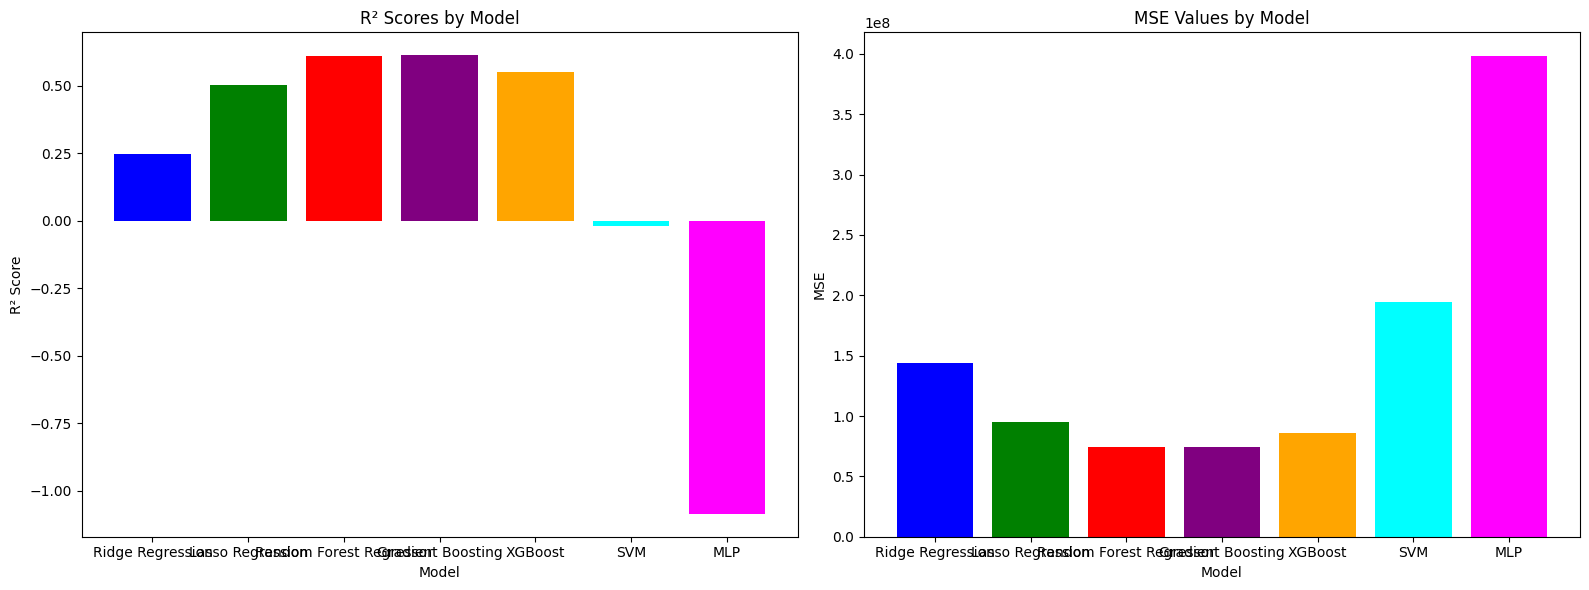

In [39]:
from sklearn.neural_network import MLPRegressor

# MLP Regressor
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_mlp = mlp_model.predict(X_test)
mlp_r2 = r2_score(y_test, y_pred_mlp)
mlp_mse = mean_squared_error(y_test, y_pred_mlp)

# 모델별 R² 점수와 MSE 값 업데이트
models = ['Ridge Regression', 'Lasso Regression', 'Random Forest Regressor', 'Gradient Boosting', 'XGBoost', 'SVM', 'MLP']
r2_scores = [ridge_r2, lasso_r2, rf_r2, gb_r2, xgb_r2, svm_r2, mlp_r2]
mse_values = [ridge_mse, lasso_mse, rf_mse, gb_mse, xgb_mse, svm_mse, mlp_mse]

# R² 점수 및 MSE 값 출력
for model, r2, mse in zip(models, r2_scores, mse_values):
    print(f"{model} R^2: {r2:.4f}, MSE: {mse:.2f}")

# R² 점수 시각화
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.bar(models, r2_scores, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta'])
plt.title('R² Scores by Model')
plt.xlabel('Model')
plt.ylabel('R² Score')

# MSE 값 시각화
plt.subplot(1, 2, 2)
plt.bar(models, mse_values, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta'])
plt.title('MSE Values by Model')
plt.xlabel('Model')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()
